In [1]:
library(dplyr)
install.packages("ggplot2")
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Installing package into 'C:/Users/sreya/OneDrive/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sreya\AppData\Local\Temp\RtmpArtOby\downloaded_packages


In [3]:
# Data load
crime <- read.csv("../data/crime_1617_raw_data.csv")
crime %>% 
head(5)

X.1,X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
1,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,...,24,29,08B,1154907,1893681,2016,05/10/2016 03:56:50 PM,41.86407,-87.70682,"(41.864073157, -87.706818608)"
2,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,...,20,42,08B,1183066,1864330,2016,05/10/2016 03:56:50 PM,41.78292,-87.60436,"(41.782921527, -87.60436317)"
3,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,...,37,25,24,1140789,1904819,2016,05/10/2016 03:56:50 PM,41.89491,-87.75837,"(41.894908283, -87.758371958)"
4,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,...,28,25,08B,1143223,1901475,2016,05/10/2016 03:56:50 PM,41.88569,-87.74952,"(41.885686845, -87.749515983)"
5,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,...,28,25,06,1139890,1901675,2016,05/10/2016 03:56:50 PM,41.88630,-87.76175,"(41.886297242, -87.761750709)"


Primary.Type,counts
THEFT,63660
BATTERY,52217
CRIMINAL DAMAGE,32283
ASSAULT,19484
DECEPTIVE PRACTICE,17943
OTHER OFFENSE,17914
BURGLARY,14907
NARCOTICS,12824
ROBBERY,12573
MOTOR VEHICLE THEFT,12075


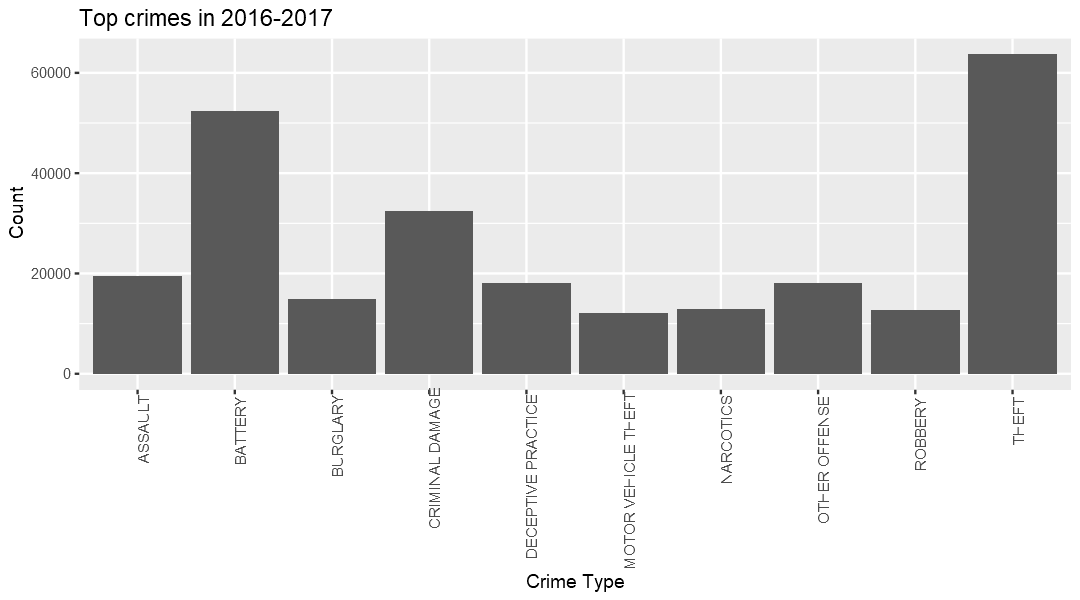

In [17]:
# Analyzing the crimes in 2016 and 2017
crime_count <- crime %>% 
  group_by(Primary.Type) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts)) 

(crime_co_plot <- crime_count %>% 
  head(10))

options(repr.plot.width = 9, repr.plot.height = 5)

crime_co_plot %>% 
  ggplot(aes(x=Primary.Type, y=counts)) +
  geom_col() +
  labs(title="Top crimes in 2016-2017", x="Crime Type", y="Count") +
  theme(axis.text.x=element_text(angle=90,hjust=1))

Location.Description,counts
STREET,63567
RESIDENCE,46710
APARTMENT,35488
SIDEWALK,23968
OTHER,11497
PARKING LOT/GARAGE(NON.RESID.),8503
SMALL RETAIL STORE,6112
RESTAURANT,5943
RESIDENTIAL YARD (FRONT/BACK),5724
ALLEY,5498


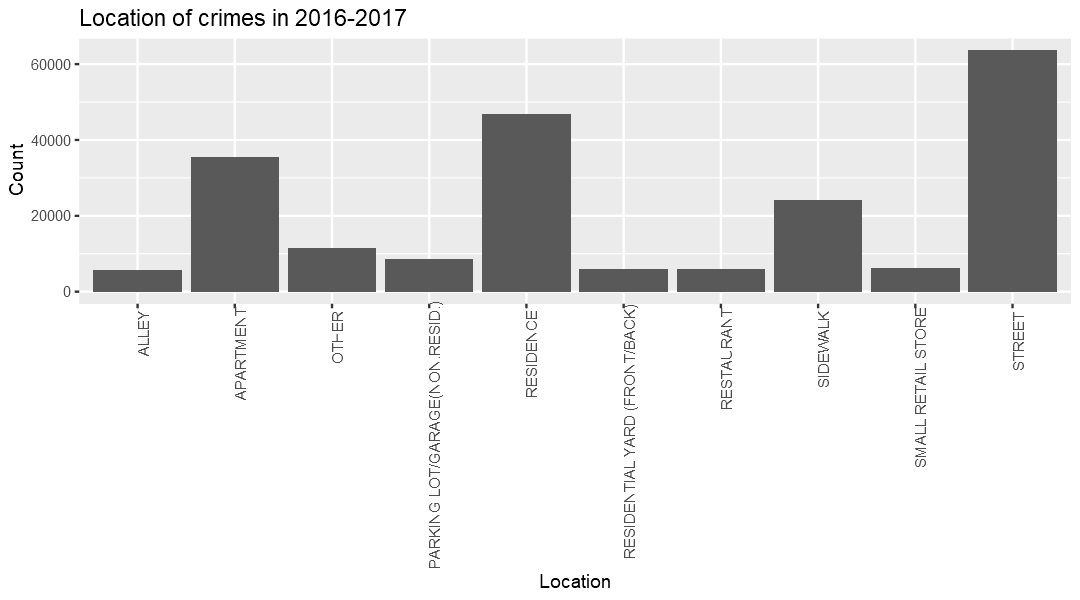

In [18]:
# Analyzing the location of crimes in 2016 and 2017
crime_location <- crime %>% 
  group_by(Location.Description) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts))

(crime_loc_plot <- crime_location %>% 
  head(10))

crime_loc_plot %>% 
  ggplot(aes(x=Location.Description, y=counts)) +
  geom_col() +
  labs(title="Location of crimes in 2016-2017", x="Location", y="Count") +
  theme(axis.text.x=element_text(angle=90,hjust=1))


Year,counts
2016,50386
2017,1902


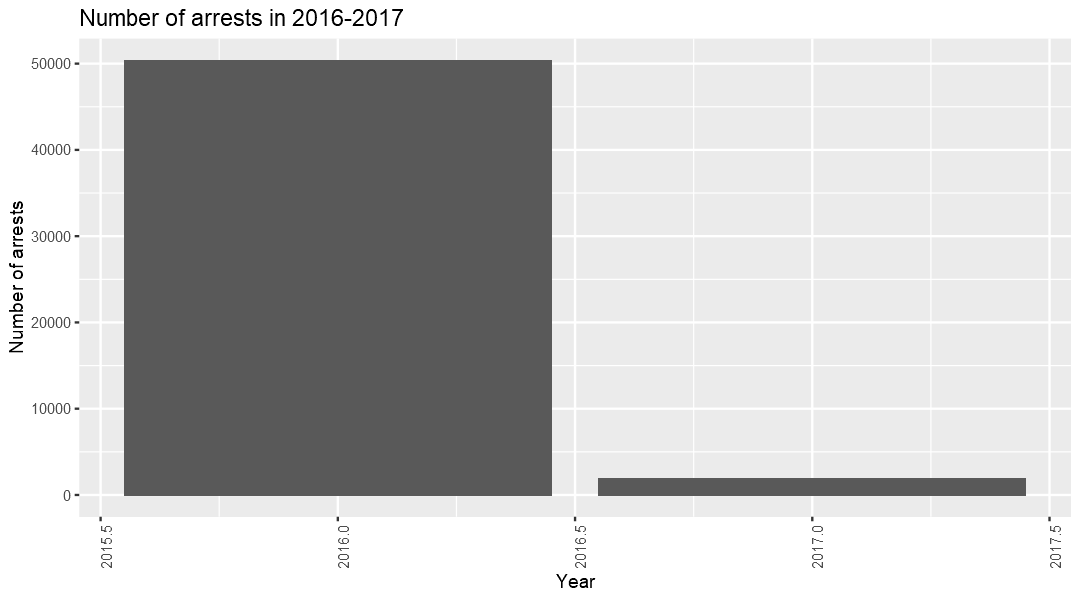

In [22]:
# Analyzing the number of arrests in 2016 and 2017
crime_arrest <- crime %>% 
  group_by(Year) %>% 
  filter(Arrest=="True") %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts))

(crime_arrest_plot <- crime_arrest %>% 
  head(10))

crime_arrest_plot %>% 
  ggplot(aes(x=Year, y=counts)) +
  geom_col() +
  labs(title="Number of arrests in 2016-2017", x="Year", y="Number of arrests") +
  theme(axis.text.x=element_text(angle=90,hjust=1))